# using machine learning to predict heart disease

*in this notebook:*
- solidify scikitlearn skills
- build a complete project
- get more familiar with the library

*steps to take:*
1. problem definition
2. data
3. evaluation
4. features
5. moddeling
6. experimentation

## *1. problem definition*

> guiven the medical attributes of a patient, can we use machine learning to *classify* if the subject has or not heart disease?

## *2. data*

the original data came from *kaggle.com*

the data is public and is avaliable at: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## *3. evaluation*

> desired accuracy: 95%

> accuracy in this case is essencial because we're determing results that can lead to bad consequences when predicted wrong

## *4. features*

**data dictionary**

* age in years
* sex (1 = male * 0 = female)
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

### using pandas *(as pd)* matplotlib *(as plt)* and numpy *(as np)* to data analysis and manipulation

In [1]:
# import cell

# import regular EDA (exploratory data analysis) libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# import models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score, recall_score, precision_score



## load data

In [2]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### data exploration and analysis (EDA)

goal: find out more about the data and because a subject matter on the data you're working

1. what question are we trying to solve?
2. what data do we have and how do we treat different types?
3. what's missing from the data and how do you deal with it?
4. where are the outliers and why should you care about them?
5. how can you add, change or remove features to get more out of your data?


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# how many of each class there are
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

#### *note: 1 = has heart disease & 0 = has not heat disease*

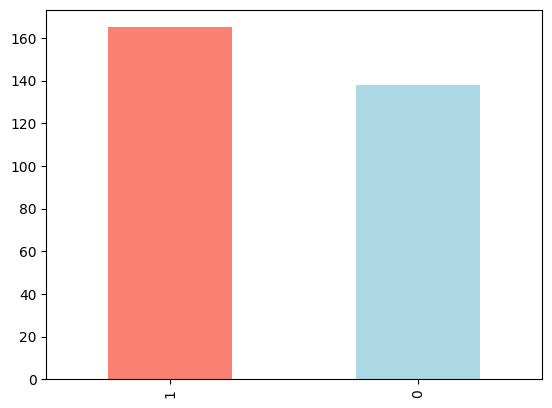

In [5]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [6]:
# additional information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# numerical information about the columns
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### *heart disease frequency compared to sex*

In [9]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# cross tab the two columns
sex_target_crosstab = pd.crosstab(df["target"], df["sex"])
sex_target_crosstab

sex,0,1
target,,
0,24,114
1,72,93


In [11]:
# chance of a woman having heart disease in df
woman_disease_rate = sex_target_crosstab.loc[1, 0]
woman_disease_rate = woman_disease_rate /  (sex_target_crosstab.loc[1, 0] + sex_target_crosstab.loc[0,0])
woman_disease_rate

0.75

In [12]:
man_disease_rate = sex_target_crosstab.loc[1, 1]
man_disease_rate = round(man_disease_rate / (sex_target_crosstab.loc[1, 1] + sex_target_crosstab.loc[0, 1]), 2)
man_disease_rate

0.45

In [13]:
# average between to sex rates:
(woman_disease_rate + man_disease_rate) / 2

0.6

In [14]:
sex_target_crosstab

sex,0,1
target,,
0,24,114
1,72,93


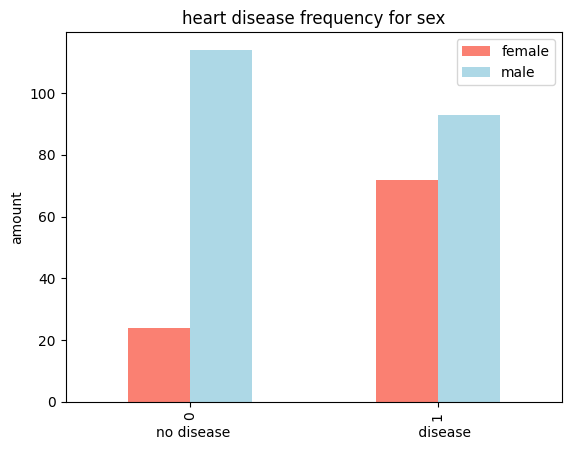

In [15]:
# create a crosstab
sex_target_crosstab.plot(kind="bar",
                         color=["salmon", "lightblue"])

plt.title("heart disease frequency for sex")
plt.xlabel("no disease                                           disease")
plt.ylabel("amount")
plt.legend(["female", "male"]);

#### *heart disease related to max heart rate and age*

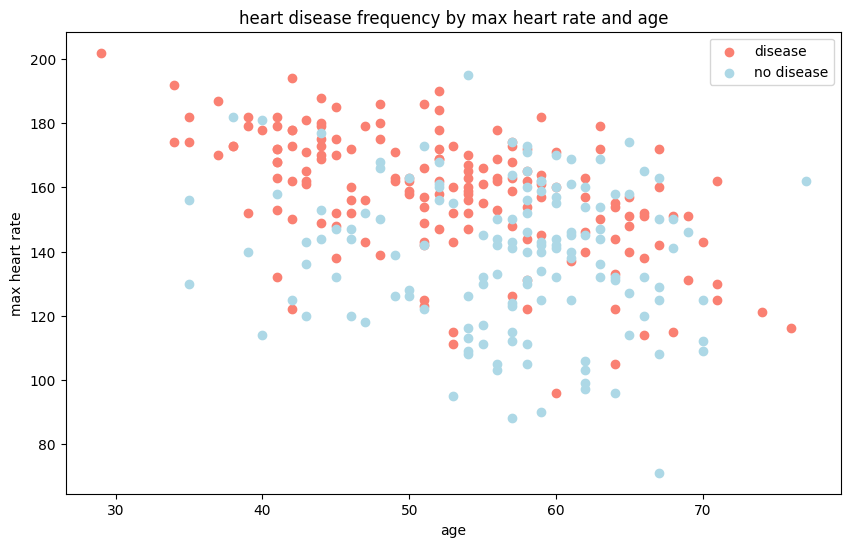

In [16]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

plt.title("heart disease frequency by max heart rate and age")
plt.xlabel("age")
plt.ylabel("max heart rate");

plt.legend(["disease", "no disease"]);

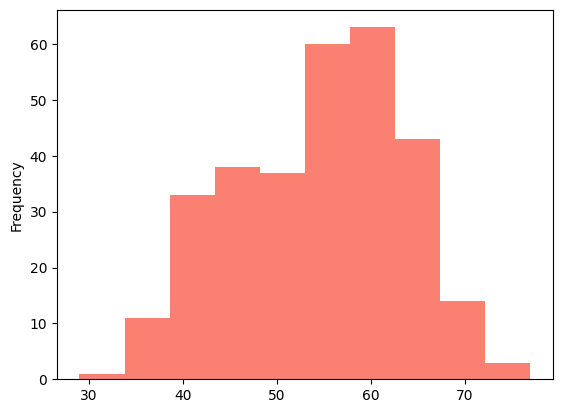

In [17]:
# check of the distribution of the age
df.age.plot.hist(color="salmon");

note: *histograms* are a good way to check of outliers in the data

#### *heart disease frequency compared to chest pain type*

##### cp = chest pain type

     0: typical angina: chest pain related to decrease of blood supply to the heart
     1: atypical angina: chest pain not related to heart
     2: non-anginal pain: typically esophageal spasms (non heart related)
     3: asymptomatic: chest pain not showing any signs of disease


In [18]:
cp_target_crosstab = pd.crosstab(df["cp"], df["target"])
cp_target_crosstab

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Text(0.5, 1.0, 'heart disease per chest pain type')

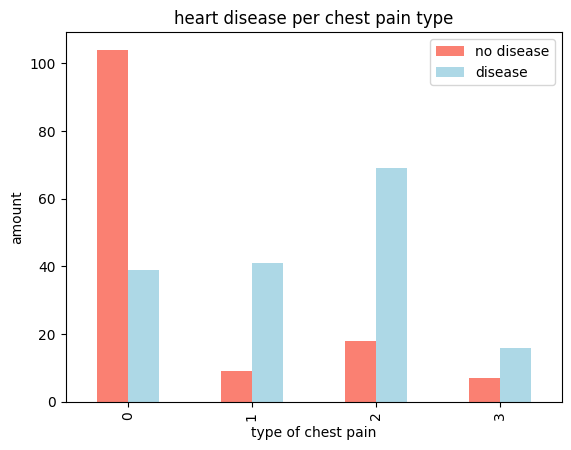

In [19]:
# make the crosstab more visual
cp_target_crosstab.plot(kind="bar",
                        color=["salmon", "lightblue"]) 
plt.legend(["no disease", "disease"])
plt.xlabel("type of chest pain")
plt.ylabel("amount")
plt.title("heart disease per chest pain type")  

### *correlation matrix*

In [20]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


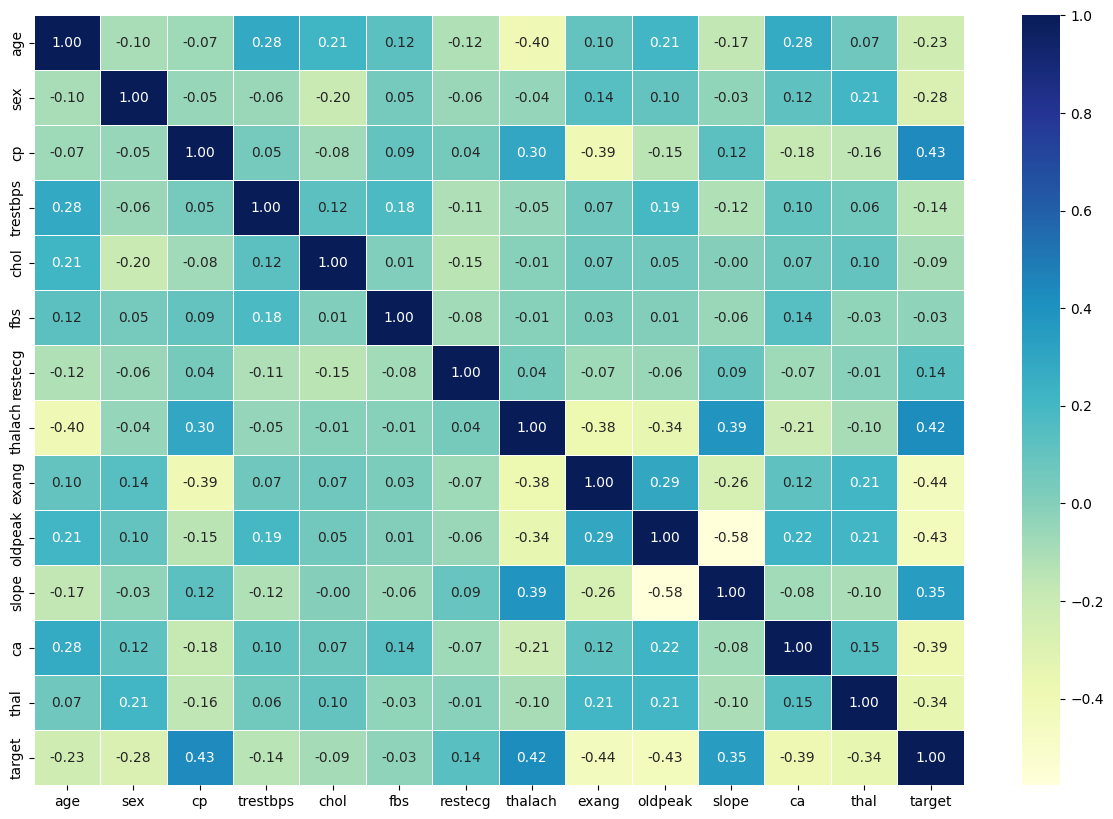

In [21]:
# making more visual
 
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

##### 0.9 - 1 means a really high positive correlation (as one goes up the other goes up too)
##### -0.9 to -1 means a really high negative correlation (as one goes up, the other goes down)
##### values close to 0 mean a poor correlation (the value of it almost does not interfere in the other)

## *5. modeling*

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# split data into x and y
x = df.drop("target", axis=1)
y = df["target"]

In [24]:
np.random.seed(42)

# split in train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


#### *models to try:*
- logistig regression
- k-nearest neighbours classifier
- random forest classifier

In [25]:
models = {"logistic regression": LogisticRegression(),
          "knn": KNeighborsClassifier(),
          "random forest": RandomForestClassifier()}

# create a function to fit and score models

def fit_and_score(models, x_train, x_test, y_train, y_test):
    '''
    fits and evaluates guiven machine learning models
    '''
    np.random.seed(42)

    # make a dict to keep model scores
    model_scores= {}
    
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = round((model.score(x_test, y_test))*100, 2)

    return model_scores

model_scores = fit_and_score(models, x_train, x_test, y_train, y_test)
model_scores

    

c:\Users\USER\Desktop\jupytervscode\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic regression': 88.52, 'knn': 68.85, 'random forest': 83.61}

#### *model comparison*

<Axes: >

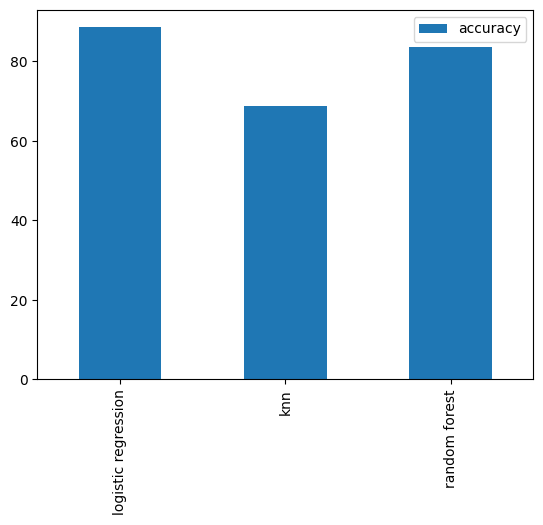

In [26]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

#### *now that baseline model is created is time to make more evaluations and improve the model after that:*

* hyperparameter tuning
* feature importance
* confusion matrix
* cross validation
* precision
* recall
* f1_score
* classification report
* ROC curve (area under curve)


**hyper param tunning**

In [27]:
# lets try knn first

train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

# loop through different n-neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # fit algorithm
    knn.fit(x_train, y_train)
    train_scores.append(round(knn.score(x_train, y_train), 2))
    test_scores.append(round(knn.score(x_test, y_test), 2))

print(train_scores)
print(test_scores)

[1.0, 0.81, 0.77, 0.74, 0.76, 0.75, 0.74, 0.72, 0.72, 0.69, 0.73, 0.7, 0.69, 0.69, 0.69, 0.67, 0.69, 0.67, 0.68, 0.67]
[0.62, 0.64, 0.66, 0.67, 0.69, 0.72, 0.7, 0.69, 0.69, 0.7, 0.75, 0.74, 0.74, 0.74, 0.69, 0.72, 0.69, 0.69, 0.7, 0.66]


max score of knn on test data was 75.0%


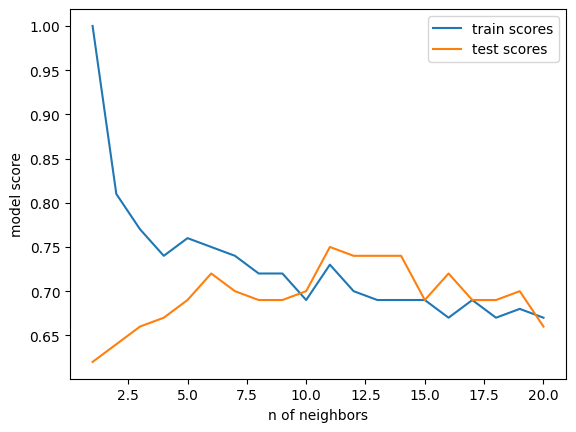

In [28]:
plt.plot(neighbors, train_scores, label="train scores")
plt.plot(neighbors, test_scores, label="test scores")
plt.xlabel("n of neighbors")
plt.ylabel("model score")
plt.legend()

print(f'max score of knn on test data was {round(max(test_scores) * 100, 2)}%')

with that result, came to the conclusion that knn can't be used in this project, because even after hyperparam tuning it was not abble to get results past 70% accuracy

#### *lets try to tune the other models using RandomizedSearchCV*

* random forest
* logistic regression

In [29]:
# grid for logistic regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# grid for random forest classifier
rand_for_grid = {"n_estimators": np.arange(10, 1000, 50),
                 "max_depth": [None, 3, 6, 9, 12],
                 "min_samples_split": np.arange(2, 20, 2),
                 "min_samples_leaf": np.arange(1, 20, 2)}


In [30]:
# tune logistic regression
np.random.seed(42)

# setup random hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=7,
                                n_iter=20,
                                verbose=True)

# fit random hyperparameter search model for logistic regression
rs_log_reg.fit(x_train, y_train);

Fitting 7 folds for each of 20 candidates, totalling 140 fits


In [31]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [32]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [33]:
# lets tune randomforest

np.random.seed(42)

# random hyper parameter search for randomforest classifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rand_for_grid,
                           cv=7,
                           n_iter=50,
                           verbose=True)

rs_rf.fit(x_train, y_train)
rs_rf.score(x_test, y_test)

Fitting 7 folds for each of 50 candidates, totalling 350 fits


0.8688524590163934

In [34]:
rs_rf.best_params_

{'n_estimators': 360,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 3}

### *hyperparameter tuning with GridSearchCV*

since logistic regression model performed the best out of the three models we've tried we will focus on tuning him

In [35]:
# different hyperparameter for the model:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
                "tol": np.logspace(-6, -2, 5)}

# setup grid hyperparameter search for logistic regression
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid,
                          cv=5, verbose=0)

gs_log_reg.fit(x_train, y_train)

c:\Users\USER\Desktop\jupytervscode\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\Desktop\jupytervscode\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\Desktop\jupytervscode\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\Desktop\jupytervscode\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\Desktop\jupytervscode\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER\Desktop\jupyterv

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'tol': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02])})

In [36]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

##### more on logistic regression hyper parameters here: https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69

*the conclusion in general is that changing parameters in logistic regression does not get the model so much better (as they normal do in randomforests for example) so when logistic regression is used you probrably will use the baseline model since tuning is most of the time useless*

### *evaluating machine learning model (beyond accuracy)*

* ROC Curve and AUC score
* confusion matrix
* classification report
* precision
* recall
* f1_score
* when possible... use cross validation

In [37]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

**ROC Curve and AUC**

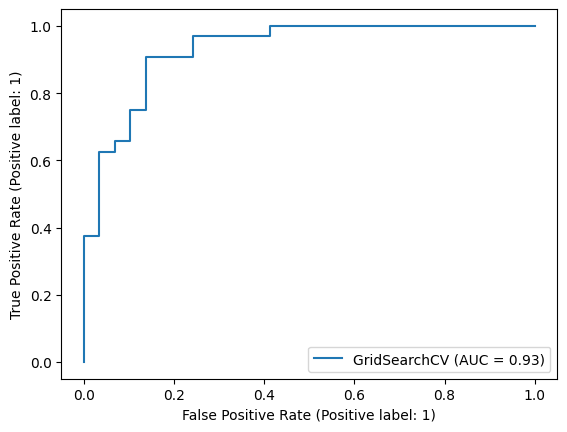

In [38]:
# plot roc curve and calculate AUC

RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test);

**confision matrix**

In [39]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


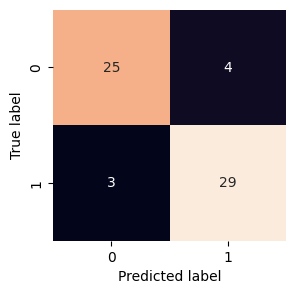

In [40]:
# plot it using seaborn
def plot_confusion_matrix(y_test, y_preds):
    '''
    plots a confusion matrix using seaborn's heatmap
    '''
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_confusion_matrix(y_test, y_preds)

**cross-validated classification report, precision and recall**

In [41]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [42]:
# cross-validated metrics
gs_log_reg = LogisticRegression(C=0.2043359,
                                solver="liblinear")

print(f'cross-validated accuracy: {round(np.mean(cross_val_score(gs_log_reg, x, y, cv=15, scoring="accuracy")) * 100, 2)}%')
print(f'cross-validated precision: {round(np.mean(cross_val_score(gs_log_reg, x, y, cv=15, scoring="precision")), 2)}')
print(f'cross-validated recall: {round(np.mean(cross_val_score(gs_log_reg, x, y, cv=15, scoring="recall")), 2)}')
print(f'cross-validated f1_score: {round(np.mean(cross_val_score(gs_log_reg, x, y, cv=15, scoring="f1")), 2)}')

cross-validated accuracy: 84.16%
cross-validated precision: 0.82
cross-validated recall: 0.92
cross-validated f1_score: 0.86


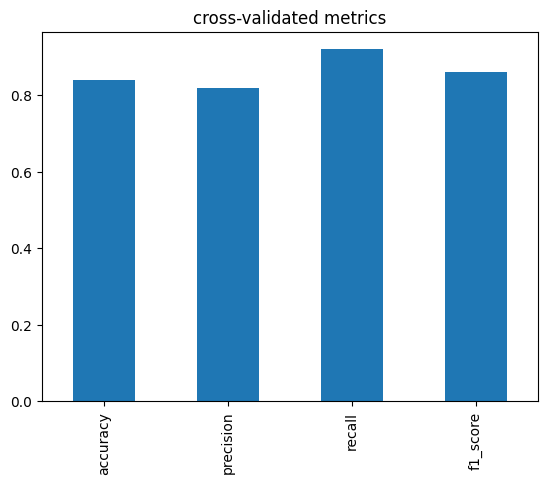

In [43]:
# visualize metrics
cv_metrics = pd.DataFrame({"accuracy": round(np.mean(cross_val_score(gs_log_reg, x, y, cv=15, scoring="accuracy")) , 2),
           "precision": round(np.mean(cross_val_score(gs_log_reg, x, y, cv=15, scoring="precision")), 2),
           "recall": round(np.mean(cross_val_score(gs_log_reg, x, y, cv=15, scoring="recall")), 2),
           "f1_score": round(np.mean(cross_val_score(gs_log_reg, x, y, cv=15, scoring="f1")), 2)},
           index=[0])

cv_metrics.T.plot.bar(title="cross-validated metrics",
                      legend=False);

### *feature importance*

feature importance is another way of asking, "witch features contributed most to the outcomes of the model and how did they contribute?

the feature importance process is diferent for each model

In [44]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
model = LogisticRegression(C=0.2043359,
                           solver="liblinear")

model.fit(x_train, y_train)

model.coef_

array([[ 0.00316728, -0.86044656,  0.66067031, -0.01156993, -0.00166374,
         0.04386102,  0.31275854,  0.02459361, -0.60413083, -0.56862792,
         0.45051626, -0.636099  , -0.6766337 ]])

In [46]:
feature_dict = dict(zip(df.columns, list(model.coef_[0])))
feature_dict

{'age': 0.0031672808662125684,
 'sex': -0.8604465624521678,
 'cp': 0.6606703076024506,
 'trestbps': -0.011569932173101342,
 'chol': -0.0016637444471420736,
 'fbs': 0.043861022680353065,
 'restecg': 0.3127585397101672,
 'thalach': 0.024593614310357243,
 'exang': -0.6041308327099246,
 'oldpeak': -0.5686279215737787,
 'slope': 0.4505162604600363,
 'ca': -0.6360990044235822,
 'thal': -0.6766337022002701}

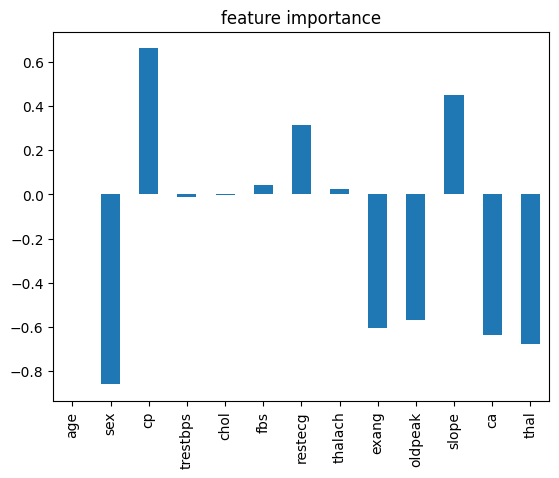

In [47]:
feature_df = pd.DataFrame(feature_dict, index=[0])

feature_df.T.plot.bar(title="feature importance",
                      legend=False);

## *6. more experimentation*

we couldn't hit the 95% metric, but the project is not over, we cen still try numerous things:
* can we collect more data?
* can we try different algorithms? like catboost or xgboost
* can we improve the current model?

### *6.1. ensemble classifiers*

combine different models into a more robust model

models to try:
* random forest
* logistic regression
* svc

In [48]:
# imports
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

goal:
- find the best logisticregression algorithm (we already have it)
- find the best random forest algorithm
- find the best svc algorithm

hopefully we can get around 90%-95% accuracy using this method

In [49]:
# save logistic regression model on new variable
log_ensemble = model

In [50]:
rand_ensemble = RandomForestClassifier()

rand_ensemble.fit(x_train, y_train)

rand_ensemble.score(x_test, y_test)

0.8524590163934426

In [51]:
# improve it using gridsearch
grid = {'n_estimators': [100, 200, 400, 1000],
        'max_depth': [None, 2, 4, 6],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [0.5, 1, 'sqrt'],
        }

rand_ensemble = RandomForestClassifier()

gs_rand = GridSearchCV(estimator=rand_ensemble,
                       cv=3,
                       verbose=0,
                       param_grid=grid)

gs_rand.fit(x_train, y_train)

gs_rand.best_score_

0.8431069958847738

In [52]:
# explore svc - support vector classificatrion

grid_2 = {'C': np.linspace(0.1, 100, 10),
          'gamma': np.linspace(0.001, 10, 10)}

svc_ensemble = SVC()

gs_svc = GridSearchCV(estimator=svc_ensemble,
                      cv=3,
                      param_grid=grid_2,
                      verbose=0)

gs_svc.fit(x_train, y_train)

gs_svc.best_params_



{'C': 33.400000000000006, 'gamma': 0.001}

In [53]:
gs_svc.best_score_

0.6735082304526748

In [54]:
gs_rand.score(x_test, y_test), gs_svc.score(x_test, y_test)

(0.9016393442622951, 0.639344262295082)

In [55]:
# combine models with voting classifier

model_ensemble = VotingClassifier(estimators=[('log', log_ensemble), ('rand', gs_rand), ('svc', gs_svc)],
                                  voting='hard')

model_ensemble.fit(x_train, y_train)

model_ensemble.score(x_test, y_test)

0.8852459016393442

#### *next we can try XGBoost*

In [56]:
# try predicting on xgboost and add it on model_ensemble if its good
from xgboost import XGBClassifier

xgb = XGBClassifier()

grid_3 = {'n_estimators': [5, 10, 20, 35, 60, 100],
        'max_depth': [None, 3, 6, 10],
        'learning_rate': [2, 1, 0.5, 0.1]}

gs_xgb = GridSearchCV(estimator=xgb,
                      cv=3,
                      param_grid=grid_3,
                      verbose=0)

gs_xgb.fit(x_train, y_train)

gs_xgb.score(x_test, y_test)

0.8360655737704918

In [57]:
model_ensemble = VotingClassifier(estimators=[('log', log_ensemble), ('rand', gs_rand), ('xgb', gs_xgb)
], voting='hard')

model_ensemble.fit(x_train, y_train)

model_ensemble.score(x_test, y_test)

0.8524590163934426

In [58]:
log_ensemble.score(x_test, y_test), gs_rand.score(x_test, y_test), gs_xgb.score(x_test, y_test)

(0.8852459016393442, 0.9016393442622951, 0.8360655737704918)

### creating a algorithm to experiment more with data

this algorithm will use primarily the random_forest which is our best classifier, but it will switch to a different model whenever its probability of correct prediction is low

lets see if this improves our results

In [90]:
# create a list that contains all of x_test rows

rows = x_test.values.tolist()

# Convert each inner list back to a DataFrame
list_of_df = [pd.DataFrame(data=[row], columns=x_test.columns) for row in rows]

auxiliar_models = [log_ensemble, gs_xgb, gs_svc]

last_model = gs_svc

predictions = np.empty(shape=(0,))

for row in list_of_df:
    if not 0.30 < gs_rand.predict_proba(row).any() < 0.70:
        predictions = np.append(predictions, gs_rand.predict(row))
    else:
        for model in auxiliar_models:
            if not 0.30 < model.predict_proba(row).any() < 0.70:
                predictions = np.append(predictions, model.predict(row))
            elif model == last_model:
                predictions = np.append(predictions, gs_rand.predict(row))
            else:
                continue


print(classification_report(y_test, predictions))



              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

